# Session 10 - PyCaret & Streamlit

Today is our last session, but I hope this is just the starting point for your learning journey. 

* You can go on from here and continue your learning of Python. Besides drilling your programming skills and understanding of data strucutres at HackerRank, Codewars or Exercism. You can look into the following popular Python libraries:

    * Airflow - Most common workflow orhcestrator and scheduler. Create directional tasks for data processing. 
    * PySpark - Batch/streaming processing at scale with distributed computing. Combined familiar dataframe concepts with SQL and advanced ML library. 
    * FastAPI - Rather fresh and widely acclaimed library to build APIs to service your data to apps or external sources.
* Side project idea to increase your learning curve. You can find an interesting use case and
    * Combine several Public APIs [(you can find a list here)](https://github.com/public-apis/public-apis). Pull data using requests library/Python SDK's (API providers own library) OR use requests/BeautifulSoup to scrape the websites instead.
    * Create scripts to ingest the data into your database or store flat files. 
    * Enrich the data by combining, cleaning multiple sources and create your API to service the new enriched data and/or apply data science tools to make predictions and create an analytical webapp with Streamlit for example. 

PS. This is my personal recommendation.

#### To solve dependency errors, create virtual environment and connect it with your Kernel here.

If you need to create a virtual environment to make it work, you can do it like this in conda terminal (CMD.exe Prompt). 

1. Create the conda environment 

`conda create --name yourenvname python=3.8`

2. Activate the conda environment

`conda activate yourenvname`

3. Install ipykernel

`pip install ipykernel pycaret streamlit`

4. Create notebook kernel connected with the conda environment

`python -m ipykernel install --user --name yourenvname --display-name "display-name"`

5. Go choose from Kernel -> Change Kernel the one with the display name. If not there, refresh your workbook (make sure you saved before if made changes).

6. To exit the venv use the following command

`conda deactivate`

# PyCaret - Automated Machine Learning

As the official documentation of PyCaret puts it, it is 
<br>
`... an open-source, low-code machine learning library in Python that automates machine learning workflows.`
<br>
Meaning that it shortens the experimentation, development, testing and deployment cycle rapidly. 
<br>
Essentially, PyCaret combines numerous machine learning libraries incl. sklearn that we have used before. 


PyCaret includes several modules for:
* Supervised classification, regression and time-series. 
<br>
* Unsupervised modules include Clustering, Anomaly Detection, Associated Rule Mining (ARM) and NLP.


Today, we will focus on classification as the main goal is to understand how to work with PyCaret rather than conduct and interpret in-depth analysis.

#### Exercise 1.0 - Import PyCaret (Install if needed), pycaret's classification module and pandas. 

In [1]:
import pycaret
import pandas as pd

In [2]:
from pycaret.classification import *

#### Exercise 1.1 - Load our already familiar Churn dataset using Pandas.
- How many rows and columns of the data do we have?

In [3]:
data = pd.read_csv("customer_churn.csv")
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


#### Exercise 1.2 - Split the dataframe into two parts, modeling and unseen data. 
1. Dataset that contains 90% of randomly sampled data with random state of 55. Call it `data`.
2. Dataset that contains the rest of the data. Call it `unseen_data`.

Make sure to reset the indexes in ascending order. 

How much data does now each of the set consist of?

PS! You will need to use pandas methods. 

#### Exercise 1.3 - Analyse the data and it's documentation - which variables are categorical or are currently numerical, and should be treated as categorical features? [Data Documentation](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset)
* Add the categorical features into a list of column names called `categorical_features`
* Treat all the rest of the features as numeric in a list called `numeric_features`

We do this because PyCaret is running an inference algorithm with the goal to automatically infer the different datatypes based on the characteristics of the data. This also means, that sometimes it can infer it incorrectly - like this potentially can happen in our case with ordinal features.

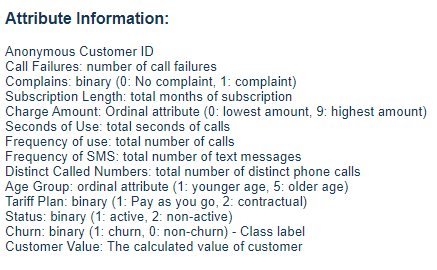

#### 1.3 - Let's initialize our model using the setup function. If you need any help then here is pycaret [Docs](https://pycaret.readthedocs.io/en/stable/api/classification.html) and [Setup Guide](https://pycaret.gitbook.io/docs/get-started/functions/initialize#setting-up-environment)
- Use our dataframe, target, categorical features and numerical features. 
- Add that 80/20 train-test split, make sure that we stratifiy the split and our stratified kfolds are 5.
- Make sure that features get normalized and that features with the inter-correlations higher than threshold of 0.8 are removed.

#### Exercise 1.4 - Compare Models. Use the compare models function to train and evaluate the performance of all the estimators using cross-valdation.
- Here the output of the function should be a scoring grid with average cross-validated scores. 
- Return the three best performing models.
- Print out the three best performing models as a list.

#### Exercise 1.5 - Tune the model. 
- Let's create a cross-validated scoring grid of the hyperparameters by using our best performing estimator - Extra Trees Classifier ('et'). Optimize the model for accuracy and use 15 iterations. Make sure it always chooses better than the input model or returns the input model. [Docs](https://pycaret.gitbook.io/docs/get-started/functions/optimize#tune_model)
- Secondly, tune our Random Forest Classifier model with custom params 

#### Exercise 1.6 - Analyze the model.
- Plot the confusion matrix for `tuned_rf` with 50% scale. (You can get help from help(plot_model) to see all available plots). 

You can use customize the plot_kwargs method and [Yellowbricks Docs](https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html) to customize the visualisations. 
- Utilize evaluate_model to get an interactive model evaluator. (Only works in Jupyter Notebook)

So, evaluate_model actually just displays a user interface fanalyzing the performance of a trained model.
Under the hood, it calls the plot_model function internally. 

#### Exercise 1.6 - Save the model.
- Refit the model on the entire "seen" dataset. 
- Use the save_model function to save the entire pipeline on your computer. 

#### Exercise 1.7 - Load the saved model and create predictions on the unseen data.

# Streamlit - Create web-apps for Data Science and Machine learning

For streamlit, use the `streamlit-exercises.py`